# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting signal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [10]:
import pickle
import sys
import os
sys.path.append(os.path.abspath("code"))
print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np

c:\Users\ptrso\OneDrive\Desktop\MasteRU\Quarter3\NRA\Assignments\LFP


In [11]:
# Download the data
# download_data('https://surfdrive.surf.nl/files/index.php/s/9nY01qMimFLez40')

# Load the data
with open('../../neural-data/01-local_field_potential/data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')
# lfp/1000 is the time in seconds

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0.5, 1.0, '2 seconds of LFP Signal')

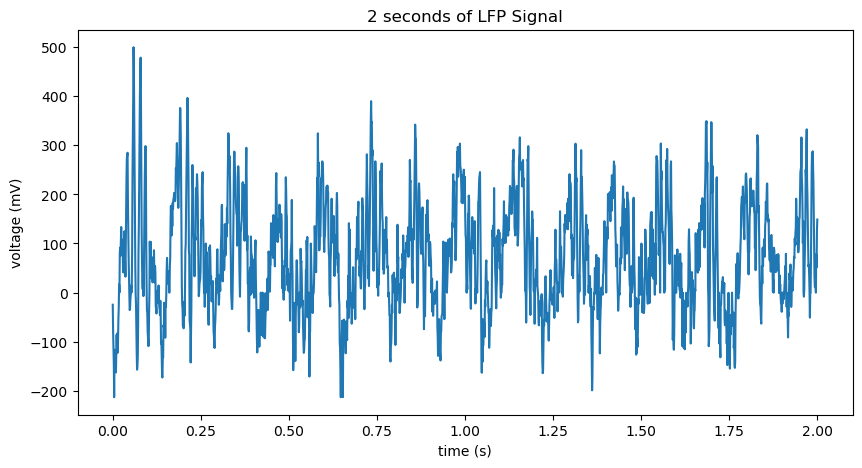

In [12]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),lfp[:2000]) # 2 seconds = 2000 lfp points
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title("2 seconds of LFP Signal")

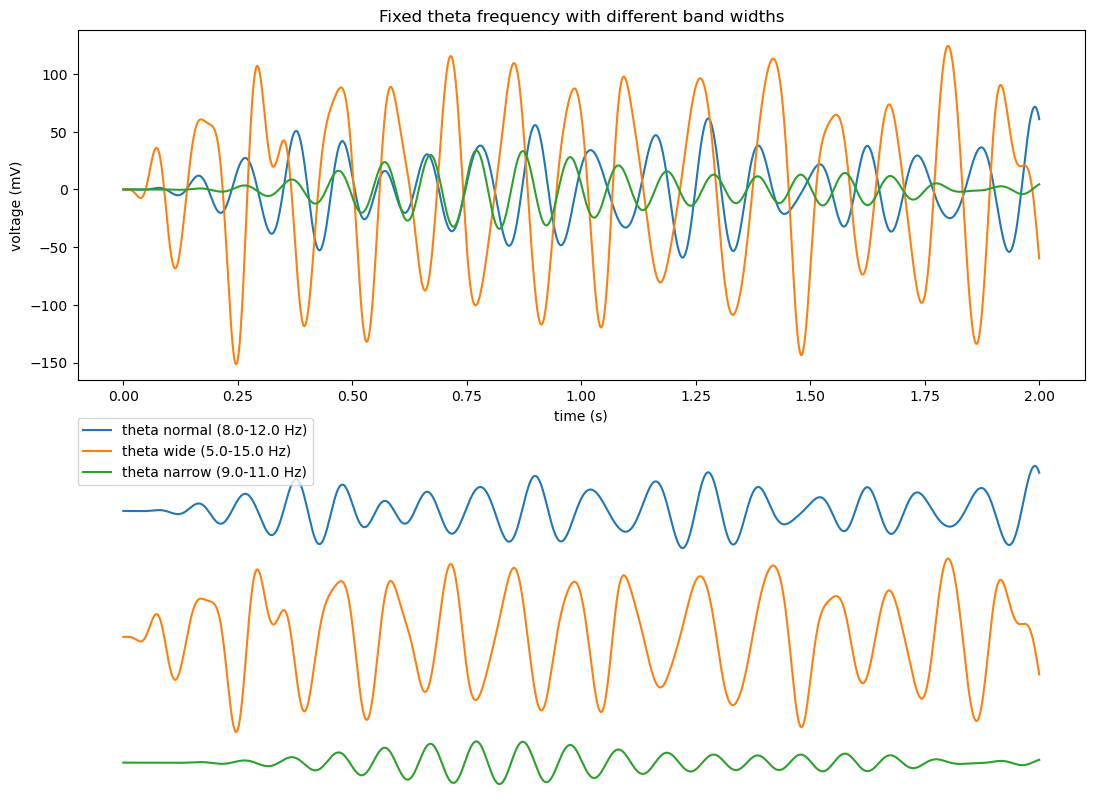

In [29]:
from scipy.signal import butter
from scipy.signal import sosfilt

def bandpass_filter(input, center_f, bandwidth, sampling_rate=sampling_rate, filter_order=5):
    low_f = center_f - bandwidth/2
    high_f = center_f + bandwidth/2
    
    filter = butter(filter_order,[low_f,high_f],
                    btype='band', 
                    output='sos', 
                    fs=sampling_rate)
                          
    wideband_lfp = sosfilt(filter, input)
    return wideband_lfp

center_f = 10
th_lfp_normal = bandpass_filter(lfp,center_f, 4)
th_lfp_wide = bandpass_filter(lfp,center_f, 10)
th_lfp_narrow = bandpass_filter(lfp,center_f, 2)


x = np.linspace(0,2,2000)  # x-axis for 2 seconds of data

def plotting(x, lfp_normal, lfp_wide, lfp_narrow, label_prefix, center_f=None, bandwidths=None, plot_offset=200, ):
    """
    x: time axis
    lfp_normal, lfp_wide, lfp_narrow: filtered signals
    plot_offset: vertical offset for stacked plot
    label_prefix: string, e.g. "theta", "beta", "gamma"
    center_f: central frequency (Hz)
    bandwidths: dict with keys 'normal', 'wide', 'narrow', values are bandwidths (Hz)
    """
    if center_f is None or bandwidths is None:
        raise ValueError("You must provide 'center_f' and 'bandwidths' (dict with keys 'normal', 'wide', 'narrow').")
    bands = {
        k: (center_f - bw/2, center_f + bw/2)
        for k, bw in bandwidths.items()
    }
    plt.figure(figsize=(13, 10))

    # First subplot
    plt.subplot(2, 1, 1)
    plt.plot(x, lfp_normal[:2000], label=f'{label_prefix} normal ({bands["normal"][0]:.1f}-{bands["normal"][1]:.1f} Hz)')
    plt.plot(x, lfp_wide[:2000], label=f'{label_prefix} wide ({bands["wide"][0]:.1f}-{bands["wide"][1]:.1f} Hz)')
    plt.plot(x, lfp_narrow[:2000], label=f'{label_prefix} narrow ({bands["narrow"][0]:.1f}-{bands["narrow"][1]:.1f} Hz)')
    plt.ylabel('voltage (mV)')
    plt.xlabel('time (s)')
    plt.title(f"Fixed {label_prefix} frequency with different band widths")

    # Second subplot
    plt.subplot(2, 1, 2)
    plt.plot(x, lfp_normal[:2000]+2*plot_offset, label=f'{label_prefix} normal ({bands["normal"][0]:.1f}-{bands["normal"][1]:.1f} Hz)')
    plt.plot(x, lfp_wide[:2000]+plot_offset, label=f'{label_prefix} wide ({bands["wide"][0]:.1f}-{bands["wide"][1]:.1f} Hz)')
    plt.plot(x, lfp_narrow[:2000], label=f'{label_prefix} narrow ({bands["narrow"][0]:.1f}-{bands["narrow"][1]:.1f} Hz)')
    plt.legend(loc=(0, 0.9))
    plt.axis('off')

plotting(
    x, th_lfp_normal, th_lfp_wide, th_lfp_narrow,
    label_prefix='theta',
    center_f=center_f,
    bandwidths={'normal': 4, 'wide': 10, 'narrow': 2}
)


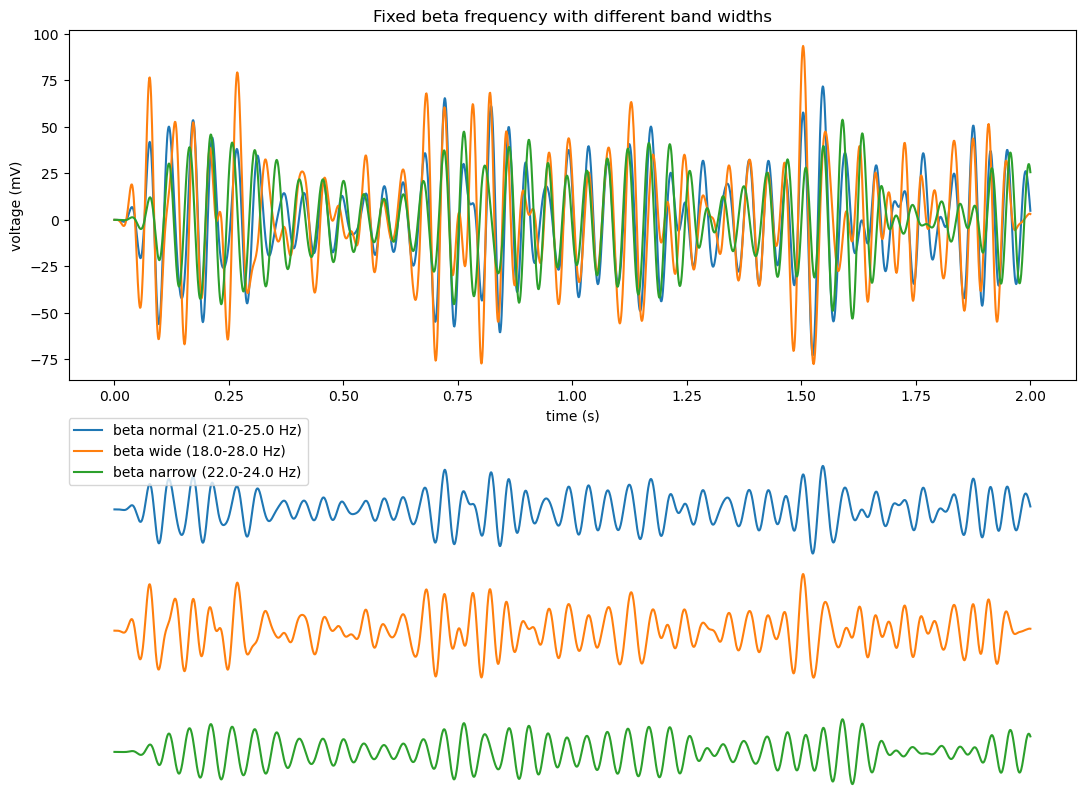

In [ ]:
# Use the same bandpass_filter and plotting functions for beta frequency bands
# Beta band parameters
center_f_b = 23
bandwidth_narrow = 8
bandwidth_wide = 16
bandwidth_wide = 16
bandwidth_normal = 12

b_lfp_normal = bandpass_filter(lfp, center_f=center_f_b, bandwidth=bandwidth_normal)
b_lfp_wide = bandpass_filter(lfp, center_f=center_f_b, bandwidth=bandwidth_wide)
b_lfp_narrow = bandpass_filter(lfp, center_f=center_f_b, bandwidth=bandwidth_narrow)

plotting(
	x, b_lfp_normal, b_lfp_wide, b_lfp_narrow,
	label_prefix='beta',
	center_f=center_f_b,
	bandwidths={'normal': 4, 'wide': 10, 'narrow': 2}
)

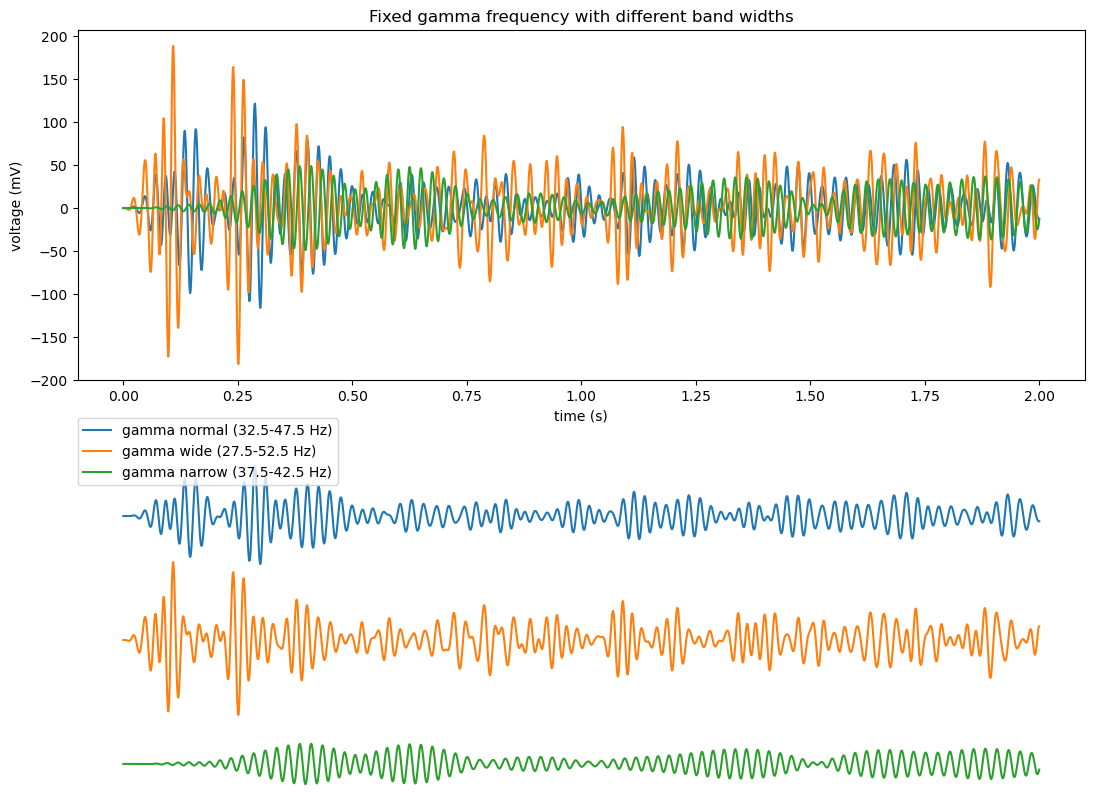

In [ ]:
# Slow gamma band parameters
center_f_g  = 40
bandwidth_narrow = 5
bandwidth_wide = 25
bandwidth_normal = 15

g_lfp_normal = bandpass_filter(lfp, center_f=center_f_g, bandwidth=bandwidth_normal)
g_lfp_wide = bandpass_filter(lfp, center_f=center_f_g, bandwidth=bandwidth_wide)
g_lfp_narrow = bandpass_filter(lfp, center_f=center_f_g, bandwidth=bandwidth_narrow)

plotting(
	x, g_lfp_normal, g_lfp_wide, g_lfp_narrow,
	label_prefix='gamma',
	center_f=center_f_g,
	bandwidths={'normal': bandwidth_normal, 'wide': bandwidth_wide, 'narrow': bandwidth_narrow},
    plot_offset=300
)

Changing central frequency

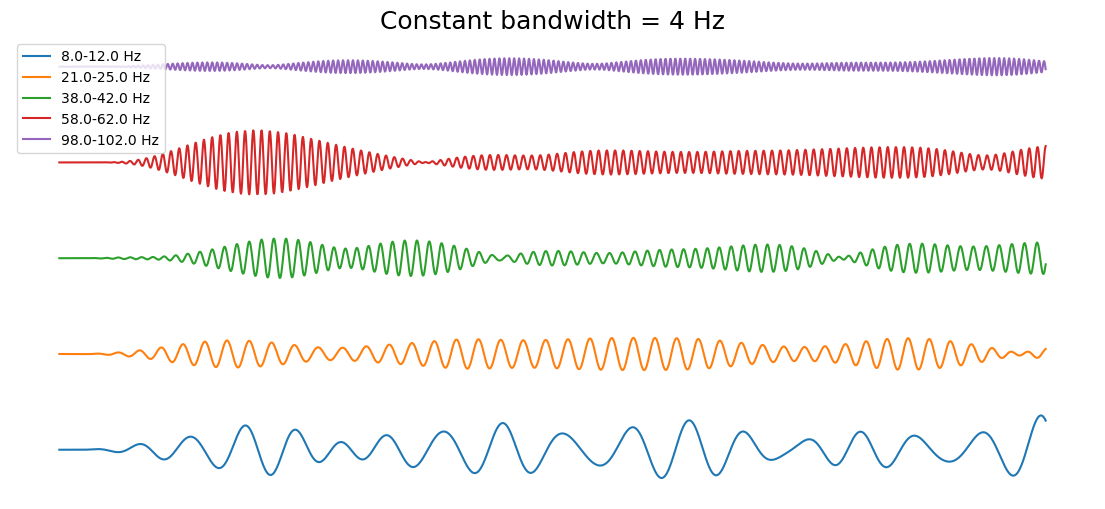

In [51]:
# Plot filtered signals for different center frequencies with the same bandwidth
bandwidth = 4  # constant bandwidth for all
center_freqs = [10, 23, 40, 60, 100]
labels = [f"{cf-bandwidth/2}-{cf+bandwidth/2} Hz" for cf in center_freqs]

filtered_signals = [bandpass_filter(lfp, center_f=cf, bandwidth=bandwidth)
    for cf in center_freqs
]

plt.figure(figsize=(14, 6))
offset = 200  # vertical offset for stacking

for i, cf in enumerate(center_freqs):

    plt.plot(x, filtered_signals[i][:2000] + i * offset, label=labels[i])
    

plt.legend(loc='upper left')
plt.title(f"Constant bandwidth = {bandwidth} Hz", fontsize=18)
plt.axis('off')
plt.show()

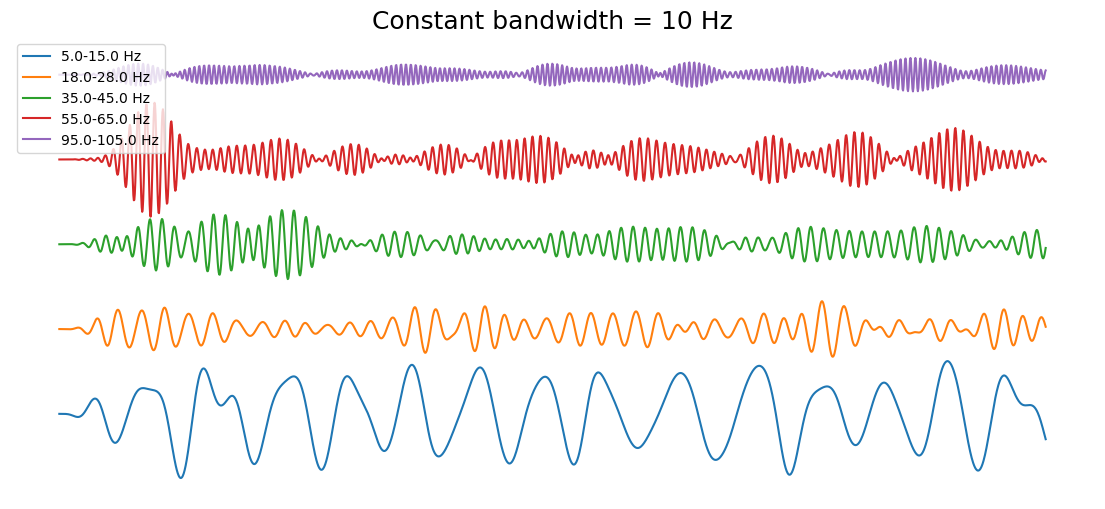

In [52]:
bandwidth = 10  # constant bandwidth for all
center_freqs = [10, 23, 40, 60, 100]
labels = [f"{cf-bandwidth/2}-{cf+bandwidth/2} Hz" for cf in center_freqs]

filtered_signals = [bandpass_filter(lfp, center_f=cf, bandwidth=bandwidth)
    for cf in center_freqs
]

plt.figure(figsize=(14, 6))
offset = 200  # vertical offset for stacking

for i, cf in enumerate(center_freqs):

    plt.plot(x, filtered_signals[i][:2000] + i * offset, label=labels[i])
    

plt.legend(loc='upper left')
plt.title(f"Constant bandwidth = {bandwidth} Hz", fontsize=18)
plt.axis('off')
plt.show()

From the first plot we can observe when the band is wider it takes into consideration more frequency components around the central fixed frequency. This increases the overall amplitude but decreasing how precise it is in capturing the theta frequency. The same can be observed for the 23 Hz frequency in the beta region. So simply, the bigger the bandwidth, the less precision (more noise) we have. For small bandwidths there danger of missing important components of the signal exists around the main frequency.

As for the effect of the change of the central frequency, we can say that because the beta rythm has higher frequency oscillations, changes in bandwdith can affect the clarity significantly. Higher frequencies like gamma (40–100 Hz) show more complex oscillations, and wider bands introduce stronger envelope modulations and interference from adjacent rhythms. For low-frequency bands like theta (10 Hz), wider bandwidths still retain rhythmic clarity but increase noise. Therefore, there should be some form of dynamic adjustement of the bandwidth depending on the central frequency of the signal.

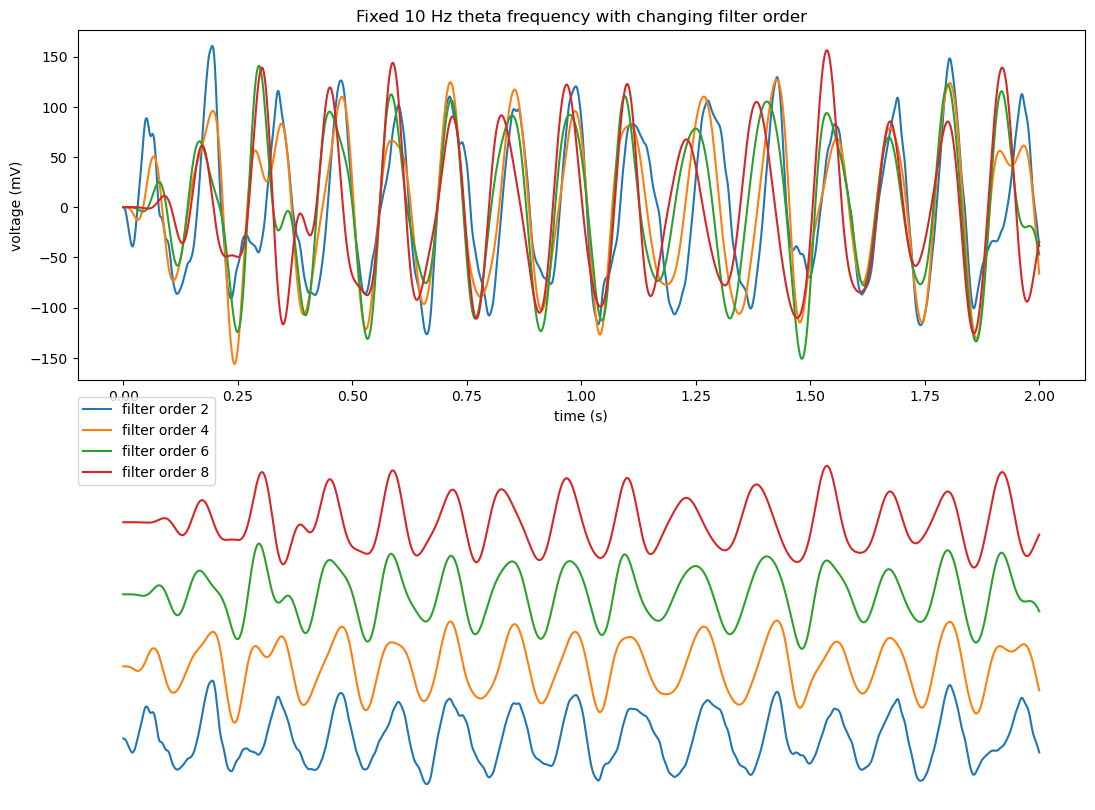

In [54]:
filter_orders = [2, 4, 6, 8]
plot_offset = 200 # to plot the signal on different lines
x = np.linspace(0,2,2000)  
plt.figure(figsize=(13, 10))

for idx, ord in enumerate(filter_orders):
    th_lfp_ord = bandpass_filter(lfp, center_f=10, bandwidth=10, filter_order=ord)

    plt.subplot(2, 1, 1)
    plt.plot(x, th_lfp_ord[:2000], label='filter order %d' % ord)
    plt.subplot(2, 1, 2)
    plt.plot(x, th_lfp_ord[:2000] + idx * plot_offset, label='filter order %d' % ord)

plt.subplot(2, 1, 1)
plt.ylabel('voltage (mV)')
plt.xlabel('time (s)')
plt.title("Fixed 10 Hz theta frequency with changing filter order")

plt.subplot(2, 1, 2)
plt.axis('off')
plt.legend(loc=(0, 0.9))

In [56]:
for ord in filter_orders:
    print(f"Filter order {ord}:")
    %timeit bandpass_filter(lfp, center_f=10, bandwidth=10, filter_order=ord)


Filter order 2:
5.4 ms ± 276 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order 4:
6.92 ms ± 245 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order 6:
9.07 ms ± 307 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order 8:
11.6 ms ± 267 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


For low filter order (example 2nd order) the signal is less smooth and shows slight distortions, especially at transitions. The oscillatory pattern is present but looks messier and noisier. The higher the filter order the smoother and more consistent the signal becomes. For a really high filter order some phase distortion may be observed in the form of delays of the peaks.

For the factor of computational time as it is expected, as the filter order increases, the computation time increases as well. This is because higher-order filters involve more complex calculations and longer convolution processes.

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

Text(0, 0.5, 'LFP')

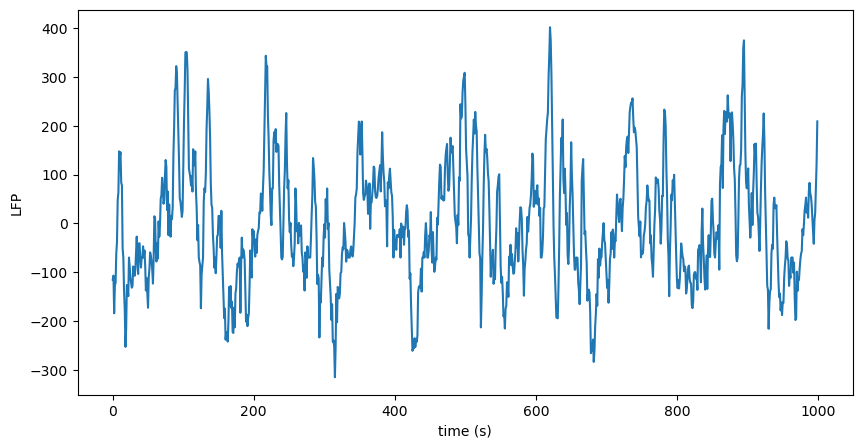

In [59]:
from pywt import scale2frequency
from pywt import cwt

start = 5 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)
plt.xlabel("time (s)")
plt.ylabel("LFP")

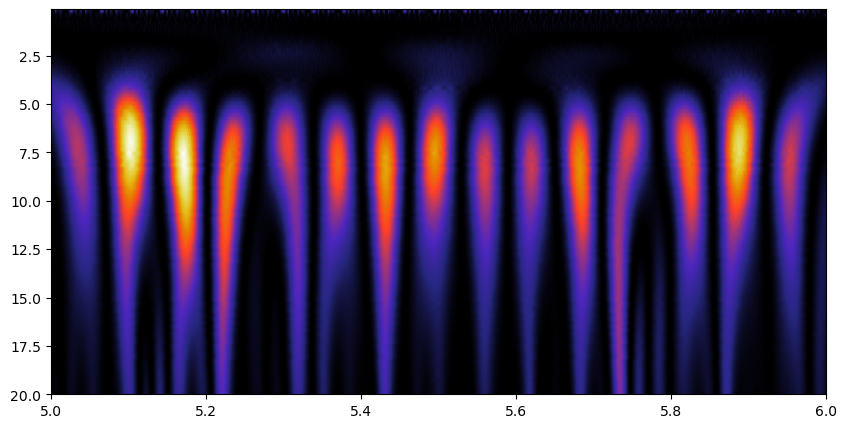

In [64]:
# Spectrogram with Mexican Hat transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


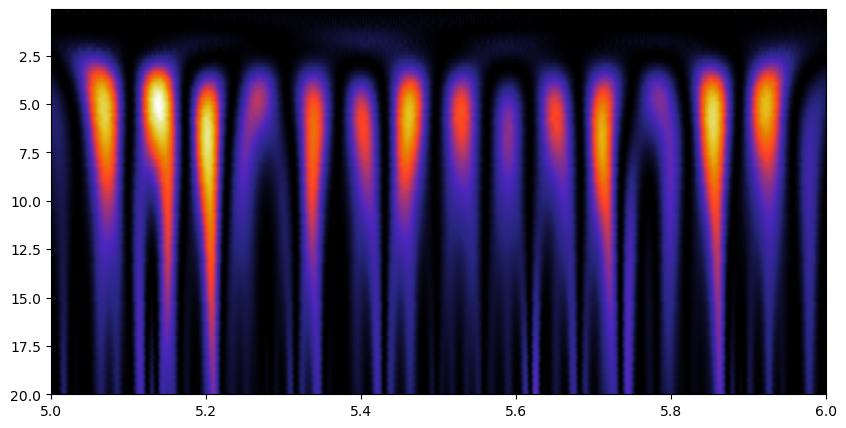

In [ ]:
# Spectrogram with 1st order gauss transform 

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
im = plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

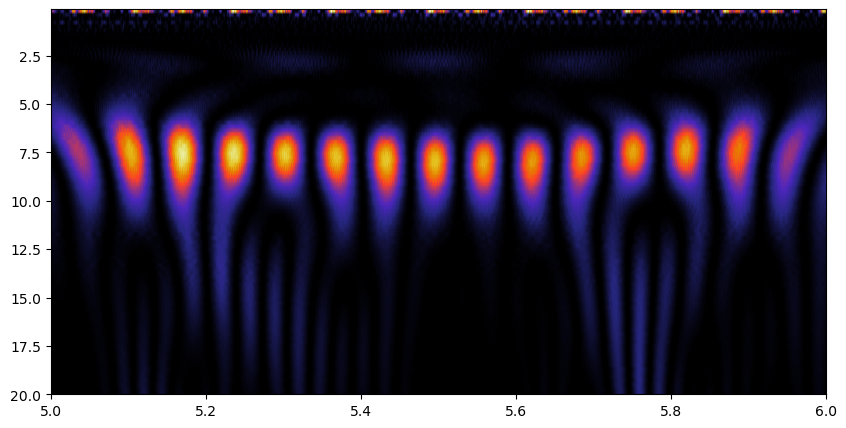

In [ ]:
# Spectrogram with real morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


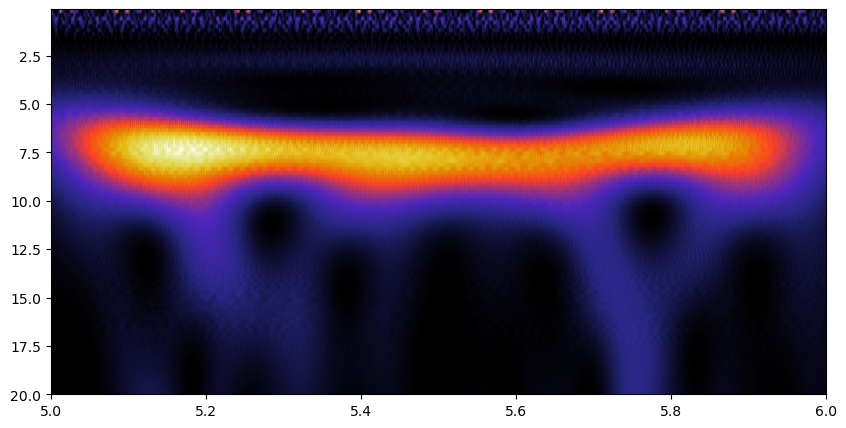

In [ ]:
# Spectrogram with complex morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


The spectrograms made with the real wavelets (like Mexican Hat, Gaussian, and real Morlet) show activity in the form of short bursts or patchy blobs across time. These real wavelets only look at the shape of the signal, and they don’t capture information about the direction or phase of the oscillation. Because of this, they often show the power as on-and-off bursts, even when the signal is continuous like LFPs.

In contrast, the spectrogram made with the complex Morlet wavelet looks smooth and continuous as it is expected, especially around the main frequency (around 8 Hz). This is because the complex Morlet wavelet captures both the size (amplitude) and the direction (phase) of the oscillation. It gives a fuller picture of the signal, allowing it to detect and show continuous activity more clearly.